### Implementing Quantum Teleportation algorithm in Python
This Python script demonstrates the Quantum Teleportation algorithm using the Qiskit library. Quantum Teleportation is a fundamental concept in quantum information theory, allowing the transfer of quantum information from one qubit to another through entanglement. The algorithm involves three qubits: one held by Alice (the sender), an entangled pair shared between Alice and Bob, and the target qubit for the teleportation held by Bob (the receiver).

The code begins by initializing a three-qubit quantum circuit using Qiskit. Alice prepares her qubit in a specific state by applying an X gate. An entangled pair is then created between Alice and Bob using a Hadamard gate and a controlled-X gate. The entanglement is visualized to confirm its creation.

Next, Alice performs operations on her qubits, including a controlled-X gate and a Hadamard gate, followed by measuring her qubits. The measurement results are then transmitted to Bob using classical communication. Based on these results, Bob applies quantum gates (controlled-X and controlled-Z gates) to his qubits to complete the teleportation process.

The code concludes by visualizing the teleportation circuit and simulating the measurement outcomes using Qiskit's Aer simulator. The measurement results are displayed and visualized using a histogram, providing insights into the successful teleportation of quantum information from Alice to Bob. This code serves as a practical example of quantum teleportation implementation using Qiskit in Python.

In [1]:
# !pip install qiskit
# !pip install qiskit-aer

In [2]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram

In [3]:
# Initializing the quantum circuit
qc = QuantumCircuit(3, 3)

# Alice's qubit
qc.x(0)
# Creating an entangled pair between Alice (qubit 1) and Bob (qubit 2)
qc.h(1)
qc.cx(1, 2)

In [4]:
# Entangled pair visualization
print("Entangled pair created between Alice and Bob:")

Entangled pair created between Alice and Bob:


In [5]:
# Alice applies a controlled-X gate between her qubits
qc.cx(0, 1)
# Alice applies a Hadamard gate to the first qubit
qc.h(0)
# Measure the two qubits Alice has
qc.measure([0, 1], [0, 1])

In [6]:
# Bob applies gates according to the classical bits received from Alice
qc.cx(1, 2)
qc.cz(0, 2)

In [7]:
# Visualizing the teleportation circuit
print("Teleportation circuit:")
print(qc)

Teleportation circuit:
     ┌───┐          ┌───┐┌─┐        
q_0: ┤ X ├───────■──┤ H ├┤M├──────■─
     ├───┤     ┌─┴─┐└┬─┬┘└╥┘      │ 
q_1: ┤ H ├──■──┤ X ├─┤M├──╫───■───┼─
     └───┘┌─┴─┐└───┘ └╥┘  ║ ┌─┴─┐ │ 
q_2: ─────┤ X ├───────╫───╫─┤ X ├─■─
          └───┘       ║   ║ └───┘   
c: 3/═════════════════╩═══╩═════════
                      1   0         


In [8]:
# Using the Aer qasm_simulator backend
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1024)
result = job.result()
counts = result.get_counts(qc)

Measurement results:
{'001': 270, '010': 232, '000': 252, '011': 270}


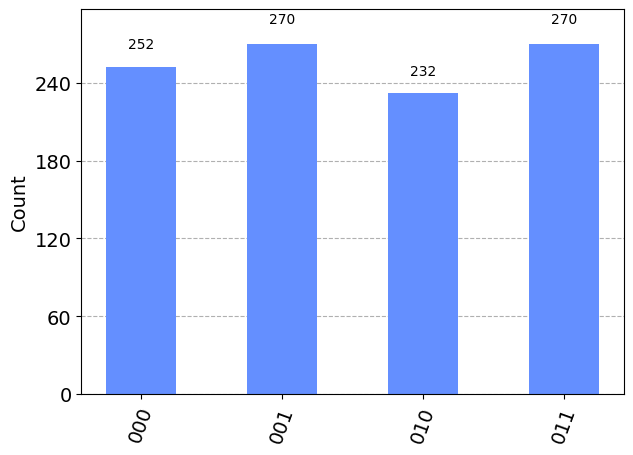

In [9]:
# Displaying the measurement results
print("Measurement results:")
print(counts)
plot_histogram(counts)